# Problem Statement



The main objective of the project to accurately predict whether or not the person is making more or less than $50,000 a year.

# About the dataset

- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education.num: Number of years spent in education. Continuous.
- marital.status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital.gain: Continuous.
- capital.loss: Continuous.
- hours.per.week: Continuous.
- native.country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K,<=50K

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

import warnings 
warnings.filterwarnings("ignore")

# Import preprocessing libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

In [2]:
# Read the dataset from a CSV file
df = pd.read_csv("adult.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Rename some columns for better readability
df.rename(columns={
    "marital.status":"marital_status",
    "education.num":"education_num",
    "capital.gain":"capital_gain",
    "capital.loss":"capital_loss",
    "hours.per.week":"hours_per_week",
    "native.country":"native_country"
},inplace=True)

In [5]:
# Display the first few rows of the dataset after renaming
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Check the shape of the dataset
df.shape

(32561, 15)

In [7]:
# List the column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
# Display information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Check for missing values and sum them up for each column
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Check for and remove duplicate rows in the dataset

In [11]:
df.duplicated().sum()

24

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Display summary statistics for numerical features
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [16]:
# Print the names of categorical features
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [17]:
# Print the names of numerical features
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [18]:
# Print the names and value counts for each categorical feature
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print()
    print(30 * "*")

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

******************************
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

******************************
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

**

In [19]:
# Replace "?" with the mode (most frequent value) in categorical columns
df["workclass"] = df["workclass"].str.replace("?",df["workclass"].mode()[0])
df["occupation"] = df["occupation"].str.replace("?",df["occupation"].mode()[0])
df["native_country"] = df["native_country"].str.replace("?",df["native_country"].mode()[0])

In [20]:
# Recheck the value counts for categorical features after replacing missing values
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print()
    print(30 * "*")

workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

******************************
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

******************************
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

****************************

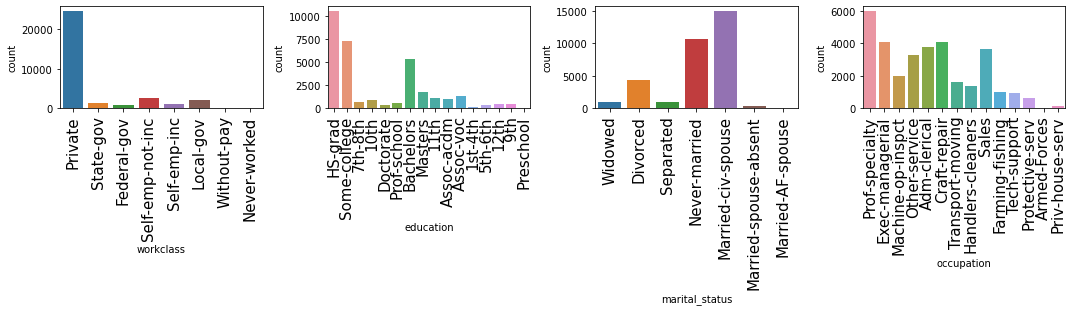

In [21]:
# Define and group columns for count plots
columns1 = ["workclass","education","marital_status","occupation"]

# Create count plots for the specified categorical columns
plt.figure(figsize=(15,6))
for i in range(len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=columns1[i],data=df)
    plt.xticks(rotation=90,size=15)
    plt.tight_layout()

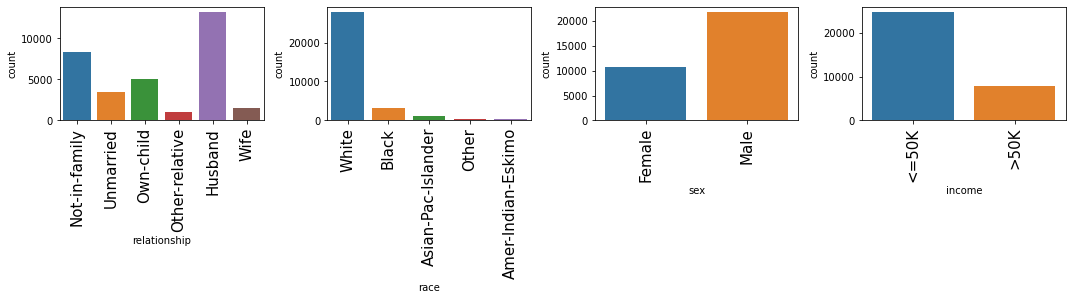

In [22]:
# Define and group columns for count plots
columns2 = ["relationship","race","sex","income"]

# Create count plots for the specified categorical columns
plt.figure(figsize=(15,6))
for i in range(len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=columns2[i],data=df)
    plt.xticks(rotation=90,size=15)
    plt.tight_layout()

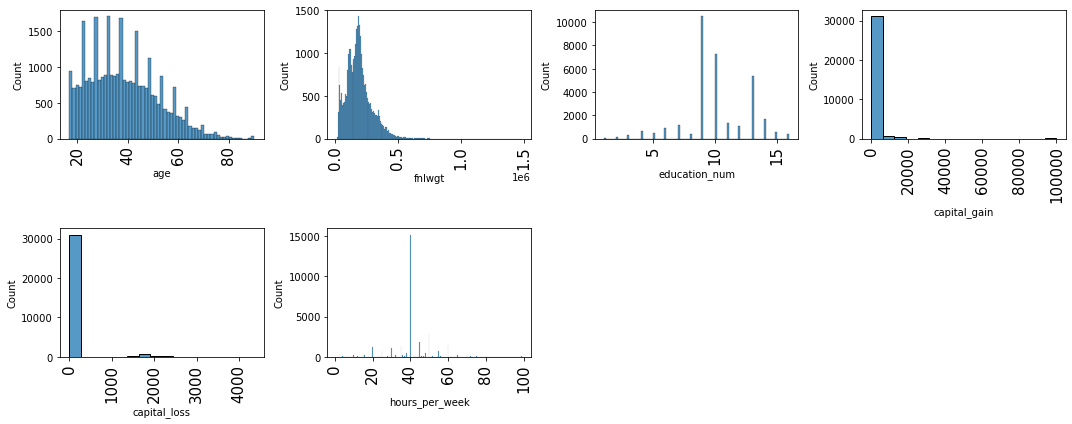

In [23]:
# Create histograms for numerical features
plt.figure(figsize=(15,6))
for i in range(len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.histplot(x=numerical_features[i],data=df)
    plt.xticks(rotation=90,size=15)
    plt.tight_layout()

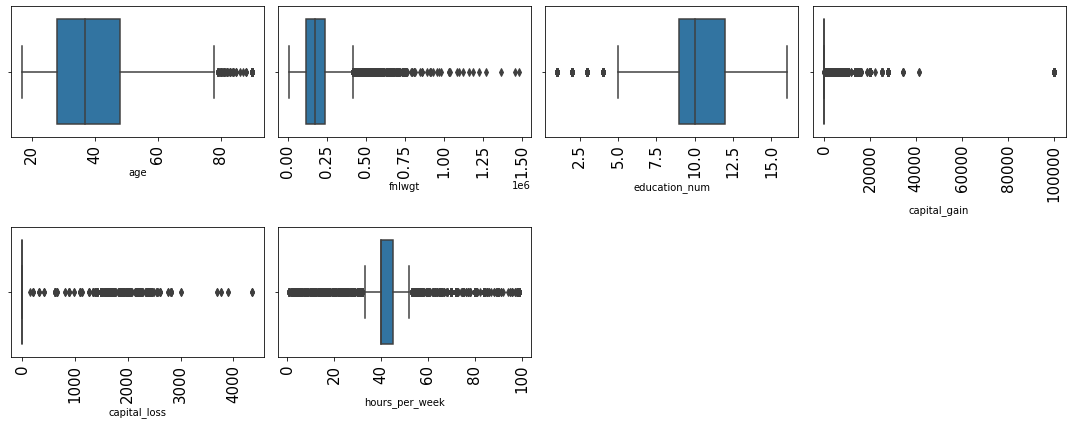

In [24]:
# Create box plots for numerical features
plt.figure(figsize=(15,6))
for i in range(len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=numerical_features[i],data=df)
    plt.xticks(rotation=90,size=15)
    plt.tight_layout()

In [25]:
# Create crosstabs and bar plots to explore relationships between categorical features and income

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

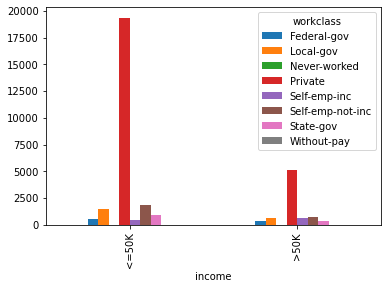

In [26]:
plt.figure(figsize=(25,25))
salary = pd.crosstab(df["income"],df["workclass"])
salary.plot(kind="bar")

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

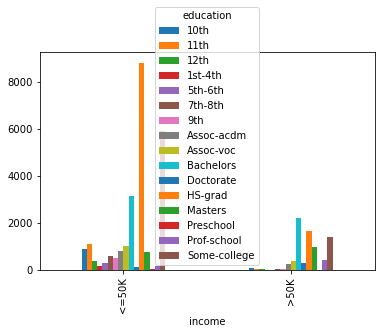

In [27]:
plt.figure(figsize=(25,25))
education = pd.crosstab(df["income"],df["education"])
education.plot(kind="bar")

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

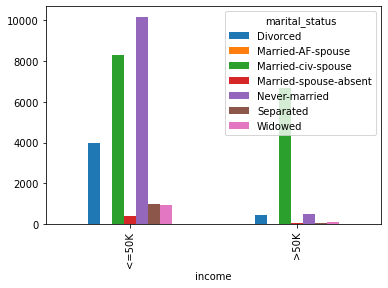

In [28]:
plt.figure(figsize=(25,25))
marital_status = pd.crosstab(df["income"],df["marital_status"])
marital_status.plot(kind="bar")

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

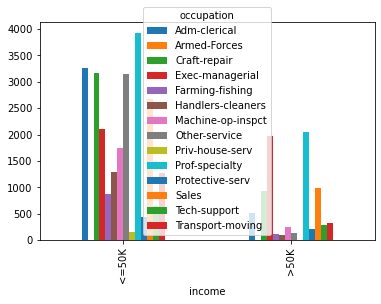

In [29]:
plt.figure(figsize=(25,25))
occupation = pd.crosstab(df["income"],df["occupation"])
occupation.plot(kind="bar")

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

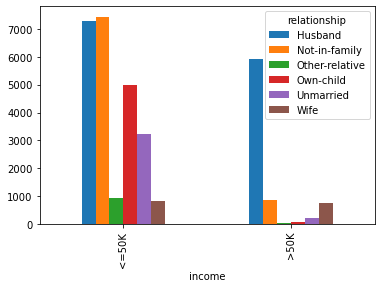

In [30]:
plt.figure(figsize=(25,25))
relationship = pd.crosstab(df["income"],df["relationship"])
relationship.plot(kind="bar")

<AxesSubplot:xlabel='income'>

<Figure size 1800x1800 with 0 Axes>

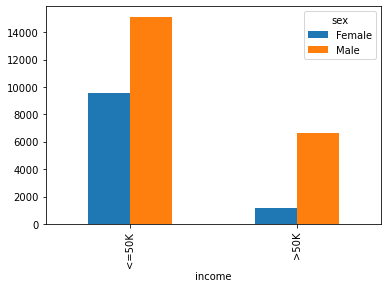

In [31]:
plt.figure(figsize=(25,25))
sex = pd.crosstab(df["income"],df["sex"])
sex.plot(kind="bar")

In [32]:
# Identify categorical features
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [33]:
# Use LabelEncoder to convert categorical features to numerical values
le = LabelEncoder()

for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [34]:
# Display the first few rows of the dataset with encoded categorical features
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<AxesSubplot:>

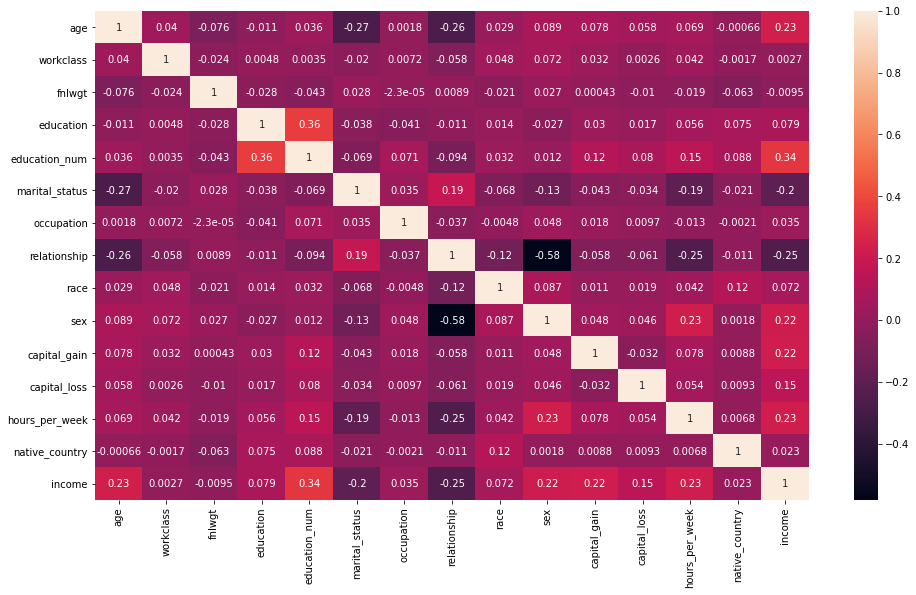

In [35]:
# Create a correlation heatmap to visualize relationships between features
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [36]:
# Drop unnecessary columns
df.drop(["education","fnlwgt","native_country"],axis=1,inplace=True)

In [37]:
# Display the first few rows of the dataset after dropping columns
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,3,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,3,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0


In [38]:
# Save the cleaned dataset to a new CSV file
df.to_csv("income_cleandata.csv",index=False)

# Model Training

In [39]:
# Display the shape (number of rows and columns) of the DataFrame
df.shape

(32537, 12)

In [40]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("income",axis=1)
y = df["income"]

In [41]:
# Define preprocessing pipelines for numerical and categorical features
num_pipeline = Pipeline(
[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

cat_pipeline = Pipeline(
[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("scaler",StandardScaler())
])

# Create a ColumnTransformer to apply the preprocessing pipelines to respective feature groups
preprocessor = ColumnTransformer(
 [("num_pipeline",num_pipeline,numerical_features)]
)

In [42]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
# Define a function for calculating various performance metrics
def performance_metrics(test,predict):
    
    confusion_matrix = print(f"Confusion Matrix: {confusion_matrix(test,predict)}")
    
    precision = print(f"Precision: {precision_score(test,predict)}")
    
    recall = print(f"Recall: {recall_score(test,predict)}")
    
    accuracy = print(f"Accuracy: {accuracy_score(test,predict)}")
    
    f1score = print(f"F1_score: {f1_score(test,predict)}")
    
    return confusion_matrix,accuracy,precision,recall,f1score

# Logistic Regression

In [44]:
# Create a Logistic Regression model
lr = LogisticRegression()

In [45]:
# Define hyperparameter search space for Logistic Regression
params = {
    "class_weight":["balanced"],
    "penalty":["l1","l2"],
    "C":[0.001,0.01,0.1,1,10,100],
    "solver":["liblinear","saga"]
}

In [46]:
# Perform hyperparameter tuning using GridSearchCV
grid = GridSearchCV(estimator=lr,param_grid=params,cv=5)

In [47]:
# Fit the GridSearchCV to the training data
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [48]:
# Display the best hyperparameters found by GridSearchCV
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [49]:
# Calculate the accuracy on the training set using the best model
grid.score(X_train,y_train)

0.7794383187982635

In [50]:
# Make predictions on the test set using the best Logistic Regression model
y_pred = grid.predict(X_test)

In [51]:
# Calculate accuracy on the test set
accuracy_score(y_test,y_pred)

0.7811923786109404

# Decision Tree

In [52]:
# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier()

In [53]:
# Define hyperparameter search space for Decision Tree Classifier
params = {
    "class_weight":["balanced"],
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [54]:
# Perform hyperparameter tuning using GridSearchCV with accuracy as the scoring metric
grid = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring="accuracy")

In [55]:
# Fit the GridSearchCV to the training data
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [56]:
# Display the best hyperparameters found by GridSearchCV
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [57]:
# Calculate the accuracy on the training set using the best model
grid.score(X_train,y_train)

0.7523147258826693

In [58]:
# Make predictions on the test set using the best Decision Tree Classifier model
y_pred = grid.predict(X_test)

In [59]:
# Calculate accuracy on the test set
accuracy_score(y_test,y_pred)

0.7417025199754149

# Random Forest

In [61]:
# Create a Random Forest Classifier model
rf = RandomForestClassifier()

In [62]:
# Define hyperparameter search space for Random Forest Classifier
params = {
    "class_weight":["balanced"],
    "max_depth":[10,8,5],
    "n_estimators":[20,50,30],
    "min_samples_split":[2,5,10],
}

In [63]:
# Perform hyperparameter tuning using GridSearchCV with accuracy as the scoring metric
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring="accuracy")

In [64]:
# Fit the GridSearchCV to the training data
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [65]:
# Display the best hyperparameters found by GridSearchCV
grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 30}

In [66]:
# Calculate the accuracy on the training set using the best model
grid.score(X_train,y_train)

0.8220062238272696

In [67]:
# Make predictions on the test set using the best Random Forest Classifier model
y_pred = grid.predict(X_test)

In [68]:
# Calculate accuracy on the test set
accuracy_score(y_test,y_pred)

0.8048555623847572